# IMPORTING LIBRARIES

In [120]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# IMPORTING DATASET

In [121]:
data=pd.read_csv('Social_Network_Ads.csv')
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

# SPLITING THE DATA FOR TRAINING 

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# FEATURE SCAILING

In [123]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# TRAINING THE MODEL

In [124]:
from sklearn.tree import DecisionTreeClassifier
cr=DecisionTreeClassifier(criterion='entropy',random_state=0)
cr.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# TESTING ON NEW INPUTS

In [125]:
print(cr.predict(sc.transform([[50,90000]])))

[1]


# TESTING ON TEST SET 

In [126]:
y_pred=cr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


# MAKING CONFUSION MATRIX

In [127]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[62  6]
 [ 3 29]]


0.91

# VISUALS ON TRAIN SET

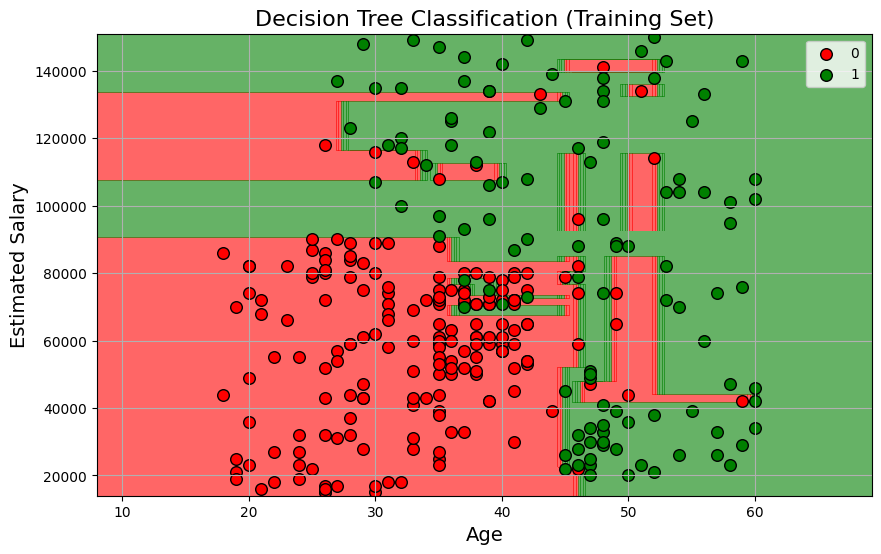

In [129]:
from matplotlib.colors import ListedColormap



X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1.25),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=.25))

plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, cr.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.6, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j, edgecolor='black', s=70)

plt.title('Decision Tree Classification (Training Set)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Estimated Salary', fontsize=14)
plt.legend()
plt.grid(True) 
plt.show()

# VISUALS ON TEST SET

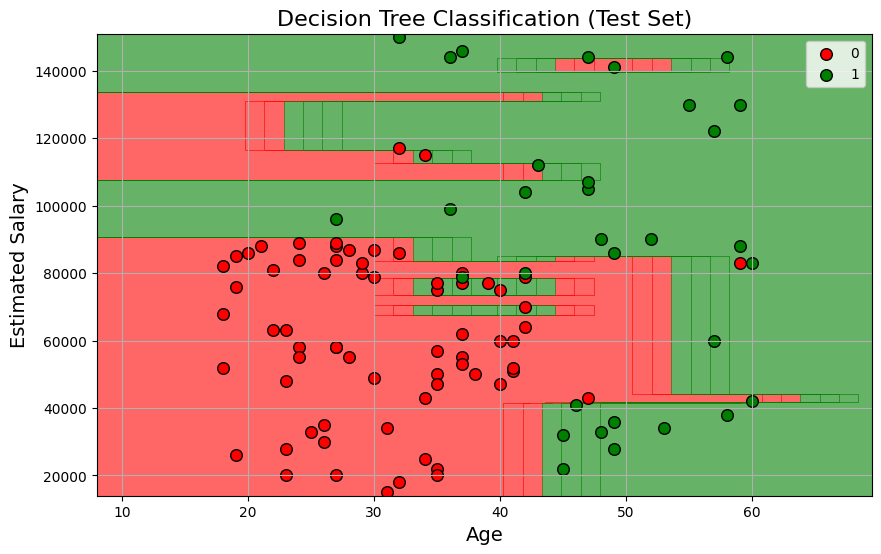

In [130]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=10.25),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=10.25))

plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, cr.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.6, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j, edgecolor='black', s=70)

plt.title('Decision Tree Classification (Test Set)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Estimated Salary', fontsize=14)
plt.legend()
plt.grid(True)  
plt.show()